# STEP 1: IMPORT LIBRARIES

In [ ]:
# !pip install pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: Load Dataset

In [ ]:
df = pd.read_csv('./Datasets/Boston_Housing.csv')

# STEP 3: Basic EDA

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0 ])

       Missing Count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


In [ ]:
# Correlation with target

correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


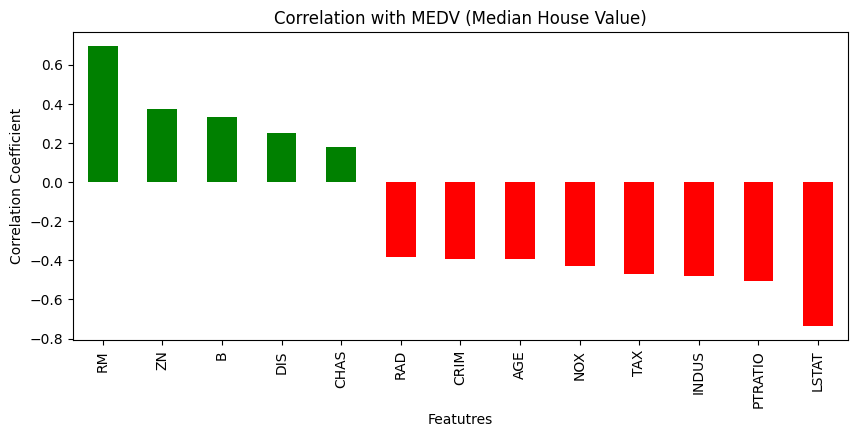

In [ ]:
# Visulize the correlation

plt.figure(figsize=(10,4))
correlation.drop(['MEDV']).plot(kind='bar', color = ['green' if x > 0 else 'red' for x in correlation.drop('MEDV')])

plt.title("Correlation with MEDV (Median House Value)")
plt.xlabel("Featutres")
plt.ylabel("Correlation Coefficient")
plt.show()

# STEP 4: OUTLIER DETECTION & HANDLING

# Resource for IQR Method:
1. https://www.geeksforgeeks.org/machine-learning/interquartile-range-to-detect-outliers-in-data/

# Outliers Handling Methods
Resource:- https://www.geeksforgeeks.org/pandas/handling-outliers-with-pandas/

### 1. Removing Outliers
- If the outliers are due to data entry errors or measurement mistakes, removing them is the best option. This method works well if the outliers are not important for analysis. Now see how it can be done.

### 2. Replacing Outliers
- In some cases outliers can be replaced with statistical measures like mean or median to reduce their impact without losing data. Median is preferred because it is less affected by extreme values.

### 3. Capping Method:
- Capping limits the extreme values to predefined upper and lower bounds ensures no value exceeds these limits.


Note:- Handling outliers effectively is important for accurate data analysis and building reliable machine learning models.

In [ ]:
# create a function to detect outlier

def detect_outliers_iqr(df, columns):
  "Detect Outlier using IQR Method"

  outliers_info = []

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_count = len(outliers)

    outliers_percentage = (outliers_count / len(df)) * 100

    outliers_info.append({
        'Feature': col,
        'Outliers': outliers_count,
        'Percentage': outliers_percentage
    })

  return pd.DataFrame(outliers_info)


def cap_outliers_iqr(df, columns):
  """Cap outliers at IQR boundaries"""
  df_capped = df.copy()

  for col in columns:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

  return df_capped

feature_cols = df.drop(['MEDV'], axis=1).columns.tolist()

print("\n--- Outlier Detection Results (IQR Method) ---")
outliers_df = detect_outliers_iqr(df, feature_cols)
print(outliers_df)


--- Outlier Detection Results (IQR Method) ---
    Feature  Outliers  Percentage
0      CRIM        65   12.845850
1        ZN        63   12.450593
2     INDUS         0    0.000000
3      CHAS        34    6.719368
4       NOX         0    0.000000
5        RM        30    5.928854
6       AGE         0    0.000000
7       DIS         5    0.988142
8       RAD         0    0.000000
9       TAX         0    0.000000
10  PTRATIO        15    2.964427
11        B        77   15.217391
12    LSTAT         7    1.383399


In [ ]:
df.shape

(506, 14)

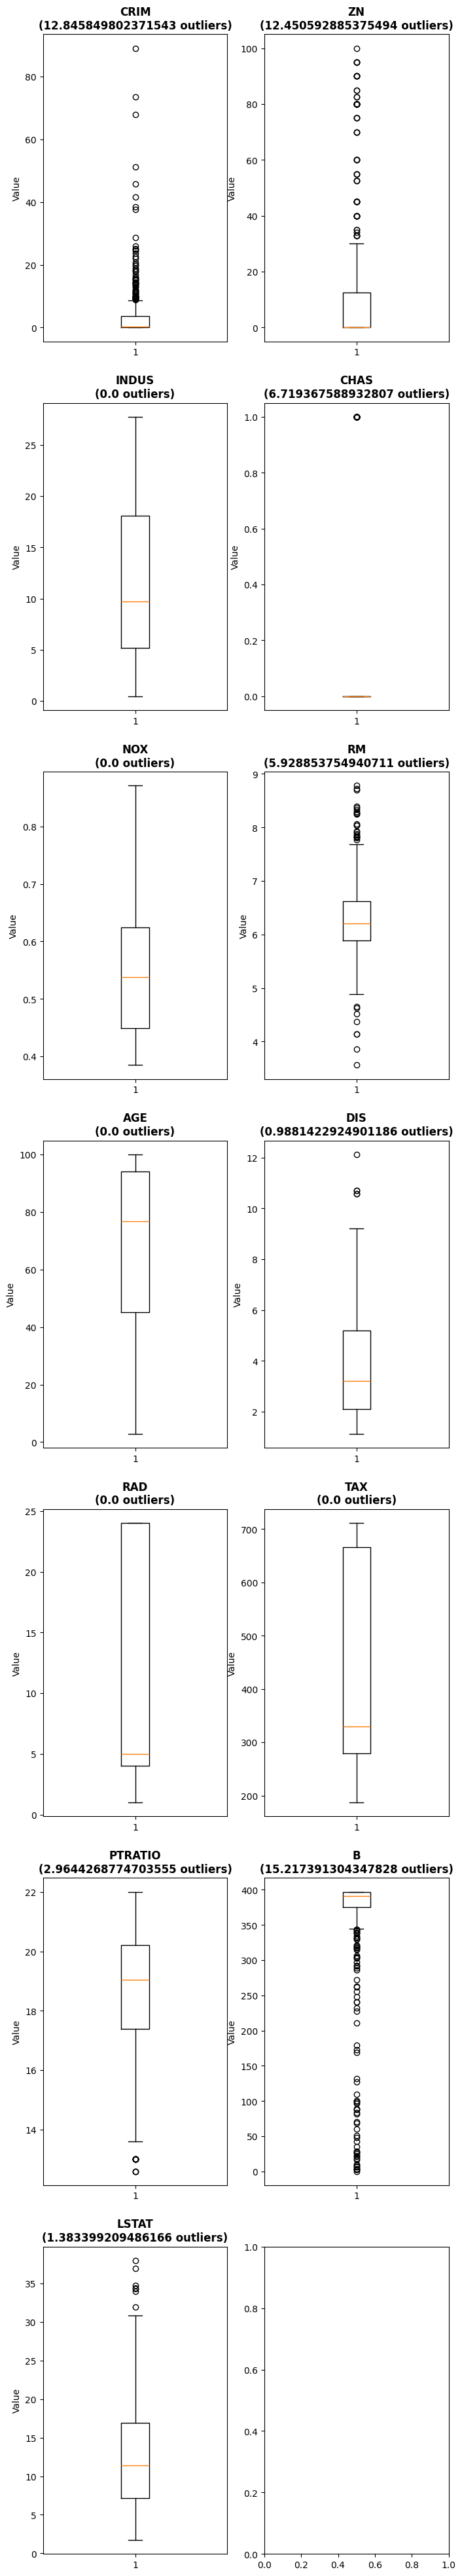

In [ ]:
# Visualize outliers with boxplots

fig, axes = plt.subplots(7, 2, figsize=(8, 50))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].boxplot(df[col].dropna())
    outlier_pct = outliers_df[outliers_df["Feature"]==col]["Percentage"].values[0]
    axes[idx].set_title(f'{col}\n({outlier_pct} outliers)', fontweight='bold')
    axes[idx].set_ylabel('Value')
    # axes[idx].grid(True, alpha=0.3)

plt.show()

# Outliers Handling Methods
Resource:- https://www.geeksforgeeks.org/pandas/handling-outliers-with-pandas/

### 1. Removing Outliers
- If the outliers are due to data entry errors or measurement mistakes, removing them is the best option. This method works well if the outliers are not important for analysis. Now see how it can be done.

### 2. Replacing Outliers
- In some cases outliers can be replaced with statistical measures like mean or median to reduce their impact without losing data. Median is preferred because it is less affected by extreme values.

### 3. Capping Method:
- Capping limits the extreme values to predefined upper and lower bounds ensures no value exceeds these limits.


Note:- Handling outliers effectively is important for accurate data analysis and building reliable machine learning models.

In [ ]:
print("\n--- Handling Outliers (Capping Method) ---")

df_original = df.copy()

df = cap_outliers_iqr(df, feature_cols)
print(df.head())


--- Handling Outliers (Capping Method) ---
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
print("\n--- Outlier Detection Results After Handling Outliers (IQR Method) ---")
outliers_df = detect_outliers_iqr(df, feature_cols)
print(outliers_df)


--- Outlier Detection Results After Handling Outliers (IQR Method) ---
    Feature  Outliers  Percentage
0      CRIM         0         0.0
1        ZN         0         0.0
2     INDUS         0         0.0
3      CHAS         0         0.0
4       NOX         0         0.0
5        RM         0         0.0
6       AGE         0         0.0
7       DIS         0         0.0
8       RAD         0         0.0
9       TAX         0         0.0
10  PTRATIO         0         0.0
11        B         0         0.0
12    LSTAT         0         0.0


In [ ]:
df.shape

(506, 14)

# STEP 5: DATA PREPROCESSING

In [ ]:
print(missing_df)

         Missing Count  Missing Percentage
CRIM                20            3.952569
ZN                  20            3.952569
INDUS               20            3.952569
CHAS                20            3.952569
NOX                  0            0.000000
RM                   0            0.000000
AGE                 20            3.952569
DIS                  0            0.000000
RAD                  0            0.000000
TAX                  0            0.000000
PTRATIO              0            0.000000
B                    0            0.000000
LSTAT               20            3.952569
MEDV                 0            0.000000


In [ ]:
# fill missing value

df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Separate features and target

X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [ ]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# STEP 6: TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print(f"Training samples: {X_train.shape}")
print(f"Testing samples: {X_test.shape}")
print(y_train.shape)
print(y_test.shape)

Training samples: (404, 13)
Testing samples: (102, 13)
(404,)
(102,)


# STEP 7: DECISION TREE - DEFAULT PARAMETERS

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
default_dt = DecisionTreeRegressor(random_state=42)
default_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Prediction
y_pred_default = default_dt.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluation

default_r2 = r2_score(y_test, y_pred_default)
default_mse = mean_squared_error(y_test, y_pred_default)
default_mae = mean_absolute_error(y_test, y_pred_default)
default_rmse = np.sqrt(mean_squared_error(y_test, y_pred_default))

print(f"Default DT R2 Score: {default_r2}")
print(f"Default DT Mean Squared Error: {default_mse}")
print(f"Default DT Mean Absolute Error: {default_mae}")
print(f"Default DT RMSE: {default_rmse}")

Default DT R2 Score: 0.8194623373653418
Default DT Mean Squared Error: 13.23950980392157
Default DT Mean Absolute Error: 2.6519607843137254
Default DT RMSE: 3.6386137200754862


In [ ]:
# Check training score (overfitting indicator)
train_r2 = default_dt.score(X_train, y_train)

print(f"--- Overfitting Check ---")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {default_r2:.4f}")
print(f"Gap: {train_r2 - default_r2:.4f}")

if train_r2 - default_r2 > 0.15:
    print("⚠️  Large gap detected - model is overfitting!")
else:
    print("✓ Model is not significantly overfitting")

--- Overfitting Check ---
Training R²: 1.0000
Test R²: 0.8195
Gap: 0.1805
⚠️  Large gap detected - model is overfitting!


# STEP 8: FEATURE IMPORTANCE (DEFAULT MODEL)

In [ ]:
# get feature importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': default_dt.feature_importances_
}).sort_values('Importance' ,ascending=False)

print("Feature Importance Ranking")
print(feature_importance)

Feature Importance Ranking
    Feature  Importance
5        RM    0.575190
12    LSTAT    0.215810
0      CRIM    0.065932
7       DIS    0.038525
8       RAD    0.028889
11        B    0.022771
4       NOX    0.016432
9       TAX    0.011163
6       AGE    0.009771
10  PTRATIO    0.008748
2     INDUS    0.006384
1        ZN    0.000386
3      CHAS    0.000000


In [ ]:
print(f"Feature Importance shape: {feature_importance.shape}")
print("\nTop 5 Importnt Features:")
print(feature_importance.head())

Feature Importance shape: (13, 2)

Top 5 Importnt Features:
   Feature  Importance
5       RM    0.575190
12   LSTAT    0.215810
0     CRIM    0.065932
7      DIS    0.038525
8      RAD    0.028889


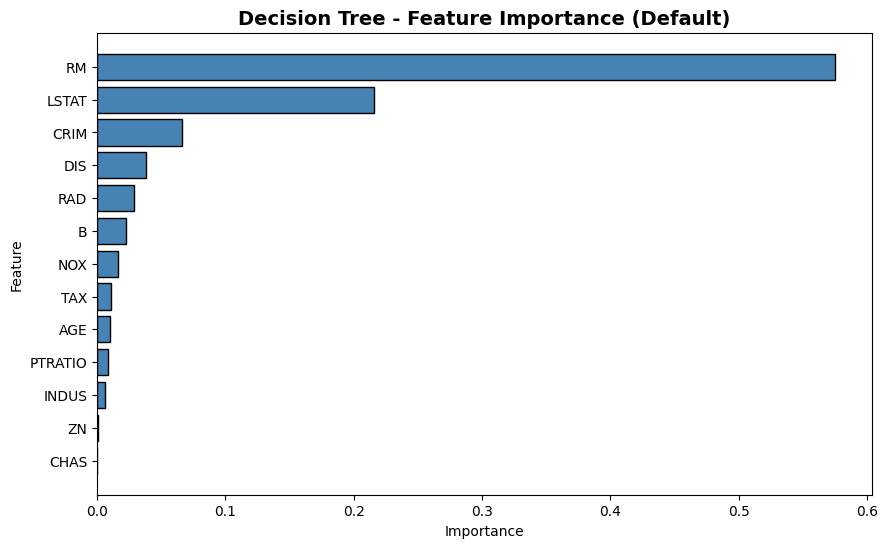

In [ ]:
# Visualize

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')

plt.title('Decision Tree - Feature Importance (Default)', fontweight='bold', fontsize=14)

plt.gca().invert_yaxis()

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# STEP 9: CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(default_dt, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

CV R² Scores: [0.73859262 0.5154939  0.60424465 0.34600326 0.6604549 ]
Mean CV R²: 0.5730 (+/- 0.1348)


In [ ]:
print(f"--- Comparison ---")
print(f"CV R² (5-fold): {cv_scores.mean():.4f}")
print(f"Test R²:        {default_r2:.4f}")
print(f"Difference:     {abs(cv_scores.mean() - default_r2):.4f}")

--- Comparison ---
CV R² (5-fold): 0.5730
Test R²:        0.8195
Difference:     0.2465


# STEP 10: HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_distributations = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

print("\nRunning GridSearchCV...")
print("Expected time: 1-2 minutes...")

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributations,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n--- Best Hyperparameters Found ---")
best_params = grid_search.best_params_

for param, value in best_params.items():
  print(f"{param}: {value}")

print(f"Best CV R² Score: {grid_search.best_score_:.4f}")


Running GridSearchCV...
Expected time: 1-2 minutes...
Fitting 5 folds for each of 336 candidates, totalling 1680 fits

--- Best Hyperparameters Found ---
max_depth: 5
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 20
Best CV R² Score: 0.7686


In [ ]:
# predict the best Model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

In [ ]:
# Evaluation

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("--- Tuned Decision Tree Performance (Test Set) ---")
print(f"Tuned R² Score: {tuned_r2:.4f}")
print(f"Tuned MSE: {tuned_mse}")
print(f"Tuned MAE: ${tuned_mae:.2f}k")
print(f"Tuned RMSE: ${tuned_rmse:.2f}k")

--- Tuned Decision Tree Performance (Test Set) ---
Tuned R² Score: 0.6088
Tuned MSE: 28.684623636746824
Tuned MAE: $3.07k
Tuned RMSE: $5.36k


# STEP 11: FEATURE IMPORTANCE (TUNED MODEL)

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)


print("--- Feature Importance Ranking ---")
print(feature_importance)

--- Feature Importance Ranking ---
    Feature  Importance
5        RM    0.612643
12    LSTAT    0.142314
4       NOX    0.141973
8       RAD    0.060861
10  PTRATIO    0.019587
0      CRIM    0.014002
11        B    0.003662
9       TAX    0.003475
7       DIS    0.001483
3      CHAS    0.000000
2     INDUS    0.000000
1        ZN    0.000000
6       AGE    0.000000


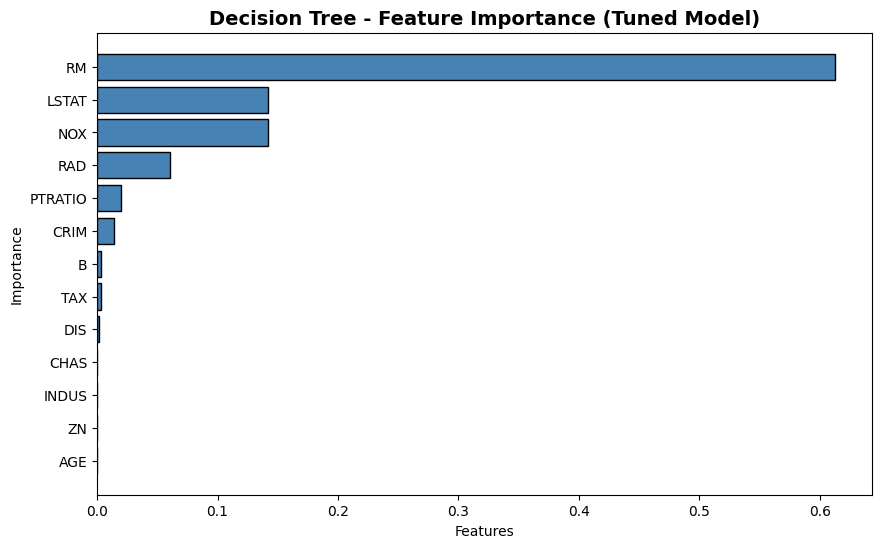

In [ ]:
# Visulize

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')

plt.gca().invert_yaxis()
plt.title('Decision Tree - Feature Importance (Tuned Model)', fontweight='bold', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# STEP 12: TREE DEPTH ANALYSIS


--- Analyzing Impact of max_depth ---
max_depth=1   : Train R²=0.4703, Test R²=0.3602
max_depth=2   : Train R²=0.6957, Test R²=0.6449
max_depth=3   : Train R²=0.7929, Test R²=0.7258
max_depth=5   : Train R²=0.9017, Test R²=0.7060
max_depth=7   : Train R²=0.9476, Test R²=0.6918
max_depth=10  : Train R²=0.9842, Test R²=0.8337
max_depth=15  : Train R²=0.9995, Test R²=0.8301
max_depth=20  : Train R²=1.0000, Test R²=0.8195
max_depth=None: Train R²=1.0000, Test R²=0.8195


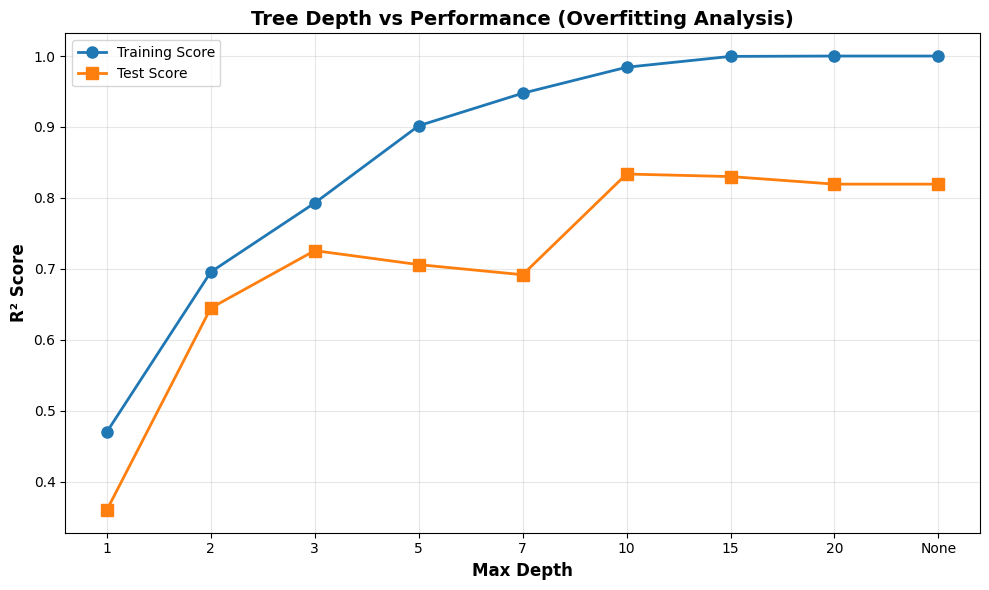


✓ Optimal max_depth: 10 (Test R² = 0.8337)


In [ ]:
print("\n--- Analyzing Impact of max_depth ---")

depths = [1, 2, 3, 5, 7, 10, 15, 20, None]
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)

    train_score = dt_temp.score(X_train, y_train)
    test_score = dt_temp.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    depth_str = str(depth) if depth is not None else "None"
    print(f"max_depth={depth_str:4s}: Train R²={train_score:.4f}, Test R²={test_score:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d is not None else "None" for d in depths]
x_pos = range(len(depths))

plt.plot(x_pos, train_scores, marker='o', linewidth=2, markersize=8, label='Training Score')
plt.plot(x_pos, test_scores, marker='s', linewidth=2, markersize=8, label='Test Score')
plt.xlabel('Max Depth', fontweight='bold', fontsize=12)
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('Tree Depth vs Performance (Overfitting Analysis)', fontweight='bold', fontsize=14)
plt.xticks(x_pos, depth_labels)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find optimal depth
optimal_idx = test_scores.index(max(test_scores))
optimal_depth = depths[optimal_idx]
print(f"\n✓ Optimal max_depth: {optimal_depth} (Test R² = {test_scores[optimal_idx]:.4f})")


# STEP 13: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Decision Tree (Default)', 'Decision Tree (Tuned)'],
    'R² Score': [default_r2, tuned_r2],
    'MSE ($k)': [default_mse, tuned_mse],
    'MAE ($k)': [default_mae, tuned_mae],
    'RMSE ($k)': [default_rmse, tuned_rmse]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R² Score'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best R² Score: {comparison.loc[best_idx, 'R² Score']:.4f}")

improvement = ((tuned_r2 - default_r2) / default_r2) * 100
print(f"✓ Improvement from tuning: {improvement:.2f}%")



                  Model  R² Score  MSE ($k)  MAE ($k)  RMSE ($k)
Decision Tree (Default)  0.819462 13.239510  2.651961   3.638614
  Decision Tree (Tuned)  0.608848 28.684624  3.068867   5.355803

✓ Best Model: Decision Tree (Default)
✓ Best R² Score: 0.8195
✓ Improvement from tuning: -25.70%


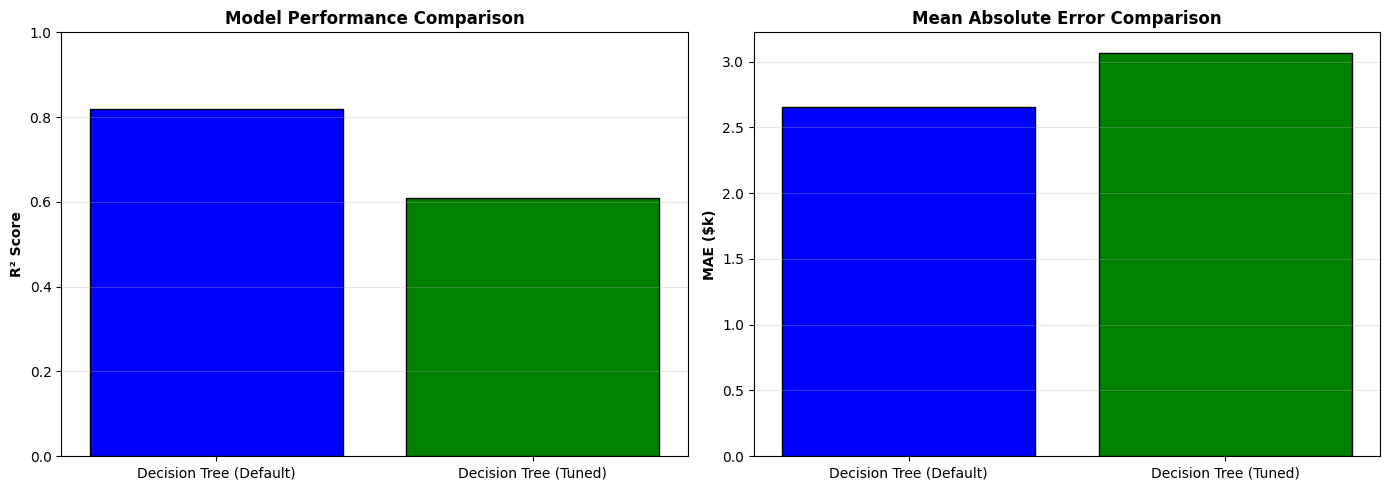

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score
axes[0].bar(comparison['Model'], comparison['R² Score'],
            color=['blue', 'green'], edgecolor='black')
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# MAE
axes[1].bar(comparison['Model'], comparison['MAE ($k)'],
            color=['blue', 'green'], edgecolor='black')
axes[1].set_ylabel('MAE ($k)', fontweight='bold')
axes[1].set_title('Mean Absolute Error Comparison', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# STEP 14: VISUALIZE DECISION TREE (OPTIONAL)

In [ ]:
from sklearn.tree import plot_tree


Visualizing tree structure (first 3 levels only)...


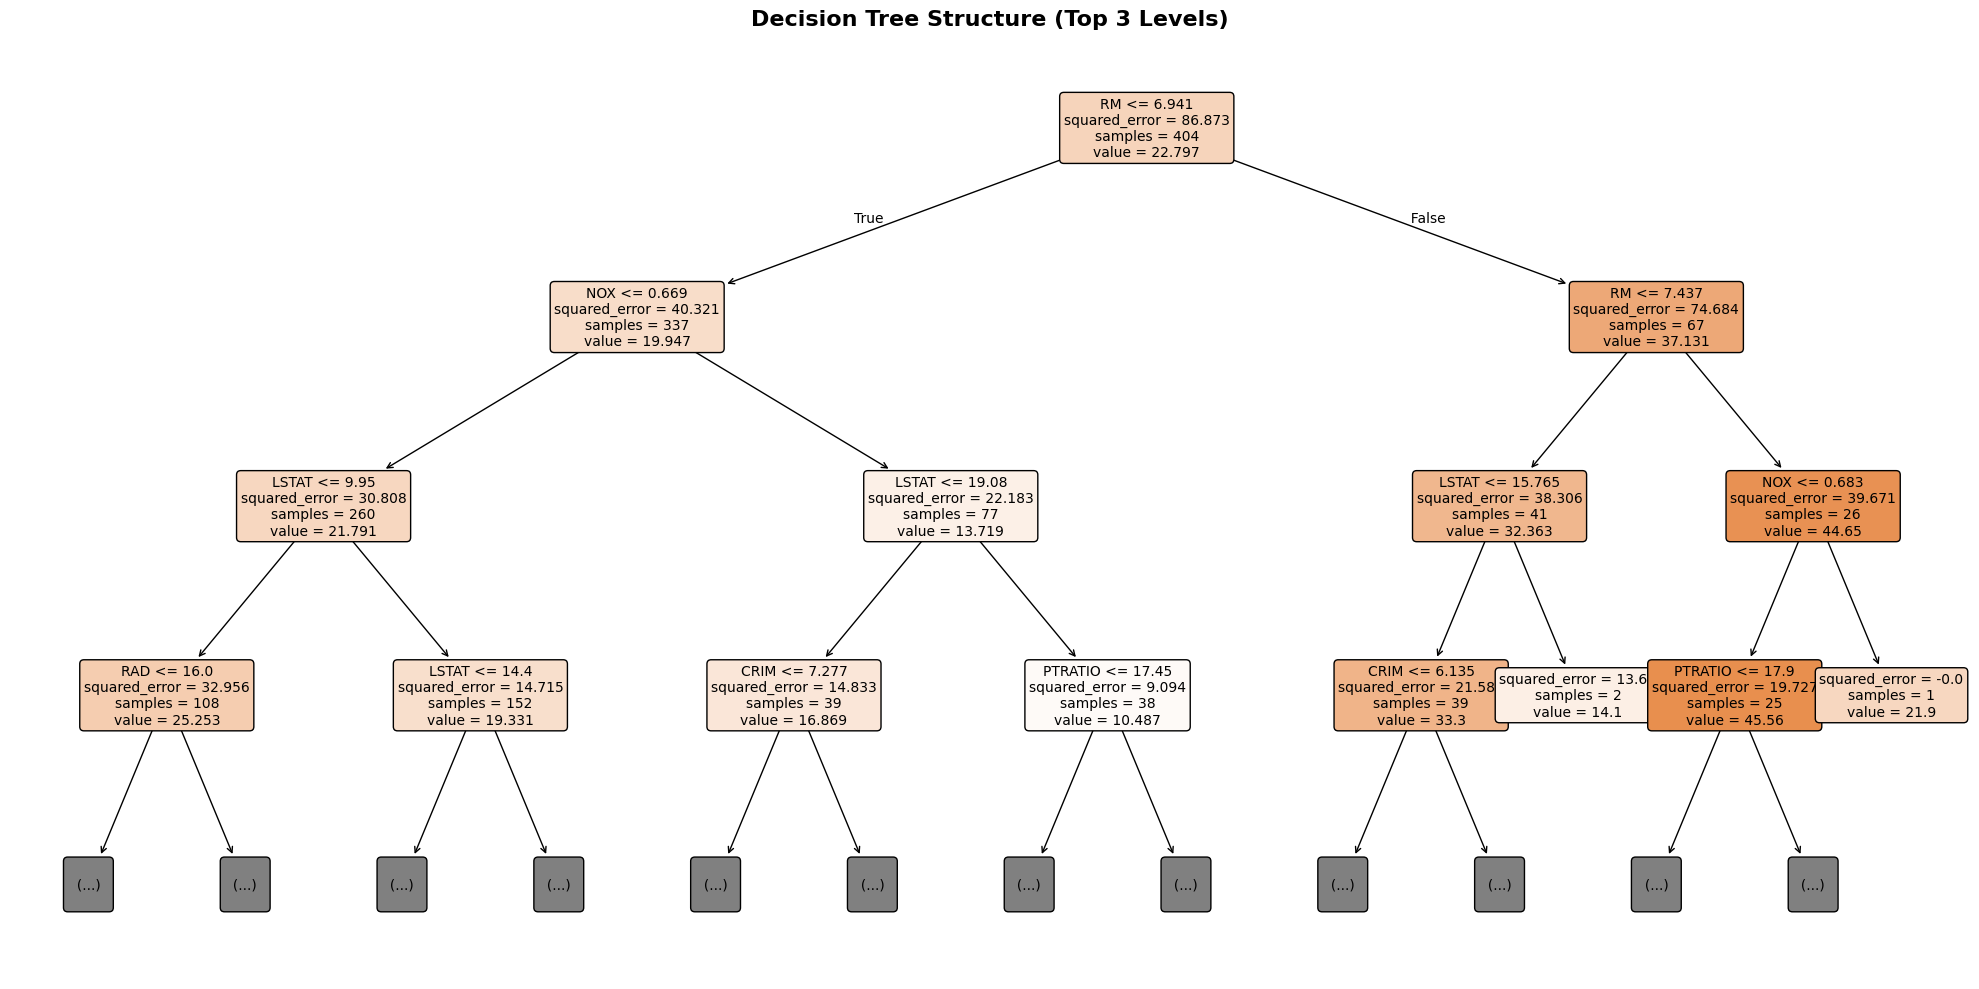

✓ Tree visualization complete
  Note: Showing only top 3 levels for readability


In [ ]:
print("\nVisualizing tree structure (first 3 levels only)...")

plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_,
          feature_names=X.columns,
          max_depth=3,  # Show only top 3 levels
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Structure (Top 3 Levels)', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

print("✓ Tree visualization complete")
print("  Note: Showing only top 3 levels for readability")

# STEP 15: VISUALIZATIONS (Optional)

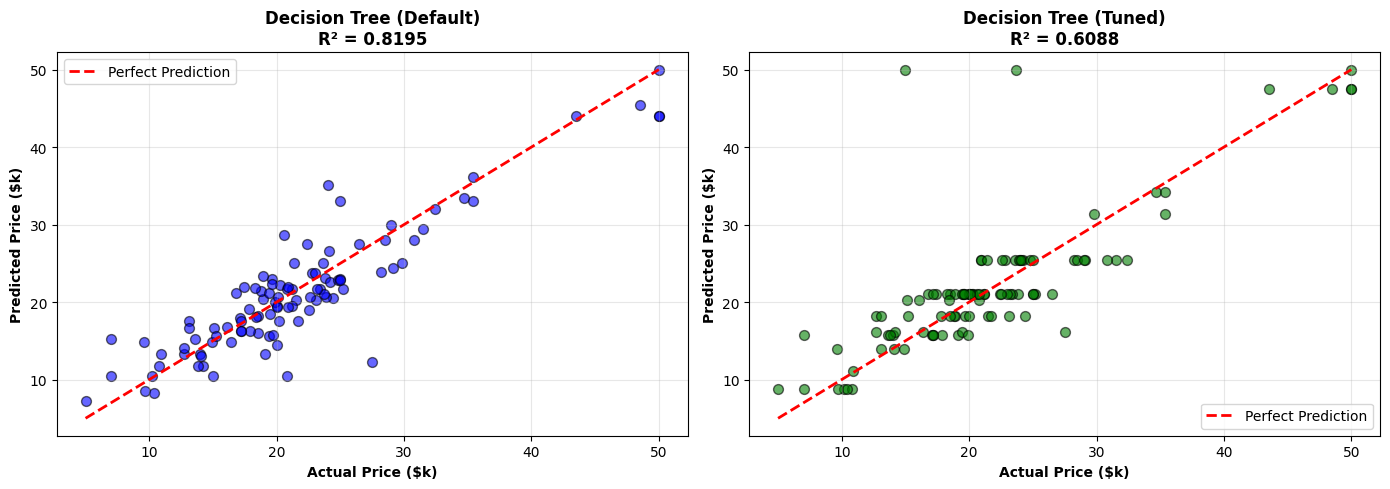

In [ ]:
# 15.1: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default model
axes[0].scatter(y_test, y_pred_default, alpha=0.6, s=50, color='blue', edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[0].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[0].set_title(f'Decision Tree (Default)\nR² = {default_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tuned model
axes[1].scatter(y_test, y_pred_tuned, alpha=0.6, s=50, color='green', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[1].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[1].set_title(f'Decision Tree (Tuned)\nR² = {tuned_r2:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

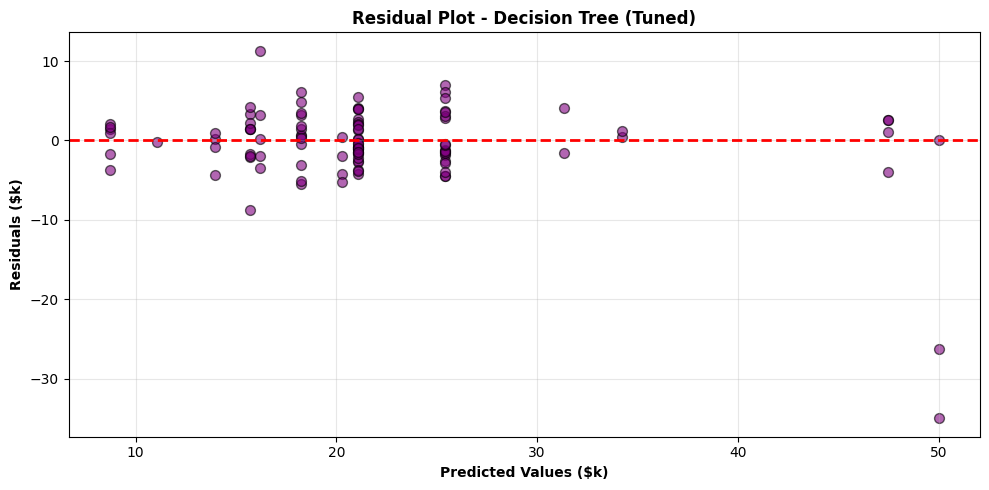

In [ ]:
# 15.2: Residual Plot
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_tuned, residuals, alpha=0.6, s=50, color='purple', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values ($k)', fontweight='bold')
plt.ylabel('Residuals ($k)', fontweight='bold')
plt.title('Residual Plot - Decision Tree (Tuned)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()